In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import random

import scipy.stats as st

In [2]:
# 1: procedure BLB

k = 10 #number of partitions
r = 500 #bootstrap iterations

# tau: estimators
tau = np.zeros([k,r])

def estimator_mean(data):
    return np.mean(data)

def estimator_var(data):
    return np.var(data)

In [3]:
def blb(estimator_func, data, n):
    
    # randomly partition X into k subsets
    random.shuffle(data)
    partitions = [data[i:i + k] for i in range(0, len(data), k)]

    # range for randint
    low=0
    high=len(partitions[0]) #don't need to do b-1 because upper bound is exclusive

    # for each partition
    for i in range(k):
    
        b = len(partitions[i]) 
    
        # for each partition, create r subsets
        for c in range(r):
            I = np.random.randint(low, high, size=n)
            replicate = data[I]
        
        
#         for j in range(len(I)):
#             replicate.append(X[I[(j)]])
        
            tau[i,c] = estimator_func(replicate)  
#         tau_var[i,c] = est_var(replicate)      
           
        low = low + b
        high = high + b
        
    # mean and var of estimators for each prtition, not the data        
    theta_vec = np.mean(tau,axis=1)
    sigma_sq_vec = np.var(tau,axis=1)

    # should be private. for now, non private
    theta = np.mean(theta_vec)
    sigma_sq = np.mean(sigma_sq_vec)

    return (theta, sigma_sq)

In [4]:
def plot(true_theta):
    plt.axhline(y=true_theta, color='green', linestyle=':', label = 'target')
    plt.plot([str(e) for e in list_of_n], theta_hat_vec, 
             marker='o', color='blue', label='mean of estimates')
    plt.xlabel("size of n")
    plt.ylabel("theta of estimator")
    plt.legend()
    plt.show()

    plt.loglog([str(e) for e in list_of_n], sigma_sq_hat_vec, 
             marker='o', color='blue', label='variances of estimates')
    plt.xlabel("size of n")
    plt.ylabel("sigma sq of estimator")
    plt.legend()
    plt.show()

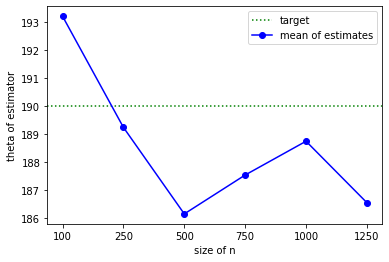

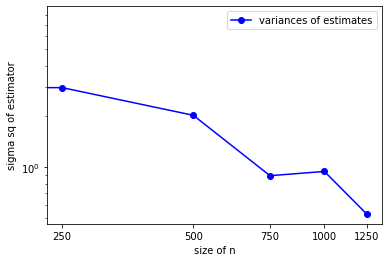

In [5]:
theta_hat_vec = []
sigma_sq_hat_vec = []

true_mean = 190
true_sd = 30

list_of_n = [100, 250, 500, 750, 1000, 1250]

#estimating mean of gaussian
for n in list_of_n:
    data = np.random.normal(true_mean, true_sd, n)
    theta, sigma_sq = blb(estimator_mean, data, n)
    theta_hat_vec.append(theta)
    sigma_sq_hat_vec.append(sigma_sq)
    
plot(true_mean)

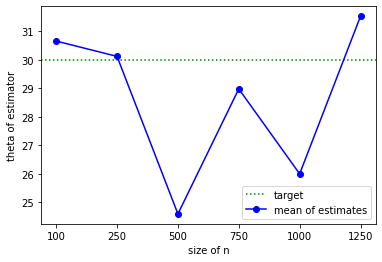

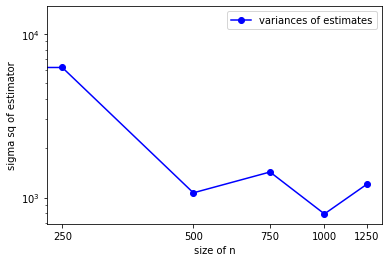

In [6]:
theta_hat_vec = []
sigma_sq_hat_vec = []

true_mean = 190
true_sd = 30

list_of_n = [100, 250, 500, 750, 1000, 1250]

#estimating variance of gaussian
for n in list_of_n:
    data = np.random.normal(true_mean, true_sd, n)
    theta, sigma_sq = blb(estimator_var, data, n)
    theta_hat_vec.append(np.sqrt(theta))
    sigma_sq_hat_vec.append(sigma_sq)
    
plot(true_sd)

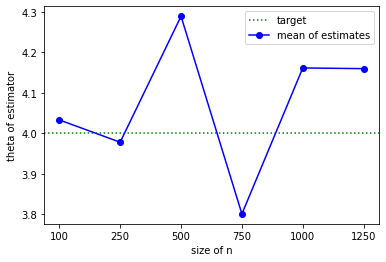

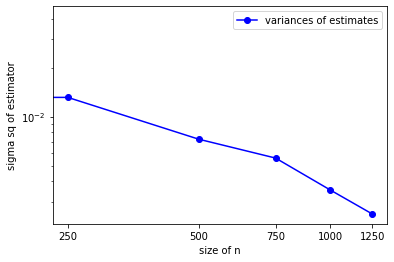

In [7]:
theta_hat_vec = []
sigma_sq_hat_vec = []

true_theta = 4


list_of_n = [100, 250, 500, 750, 1000, 1250]

#estimating mean of poisson
for n in list_of_n:
    # for t in T
    data = np.random.poisson(true_theta, n)
    theta, sigma_sq = blb(estimator_mean, data, n)
    theta_hat_vec.append(theta)
    sigma_sq_hat_vec.append(sigma_sq)
    #check ci and keep track if contains true theta
    
plot(true_theta)

In [10]:
# Confidence Intervals Using the normal Distribution (n>30)

ci_vec = []

for i in range(len(theta_hat_vec)):
    print(theta_hat_vec[i])
    ci = st.norm.interval(alpha=0.95, loc=theta_hat_vec[i], scale=np.sqrt(sigma_sq_hat_vec[i]))
    ci_vec.append(ci)
    print(ci)
    
for ci in ci_vec:
    print(ci[1]-ci[0])

4.032984
(3.633506127372872, 4.432461872627128)
3.977904
(3.7531116586893716, 4.202696341310628)
4.2888744
(4.121765459668548, 4.455983340331453)
3.800955466666667
(3.654711472988745, 3.9471994603445895)
4.1612638
(4.044478073819023, 4.278049526180978)
4.15955968
(4.061109914740299, 4.2580094452597015)
0.798955745254256
0.4495846826212566
0.33421788066290503
0.2924879873558446
0.23357145236195542
0.1968995305194028


ValueError: 'y1' is not 1-dimensional

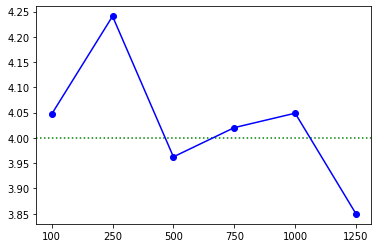

4.268919675640991
